# Week 2 - Preprocessing, part 2

# 1. Lesson: None

# 2. Weekly graph question

The Storytelling With Data book mentions planning on a "Who, What, and How" for your data story.  Write down a possible Who, What, and How for your data, using the ideas in the book.

*DATASET*
Flight delay dataset

*WHO* 
Airline Operations Leaders who want to improve the flight experience for customers and reduce operational costs.

*WHAT*
They want to know which factors contribute flight delays in order to optimize the deployment of resources and communication to customers.

*HOW*
The Flight Delay dataset can help idenitfy delay factors by route, weather, temperature, airline, etc.

# 3. Homework - work with your own data

In [57]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt


This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do  Use Google, documentation, and ChatGPT to help you:

- Summarize the datasets using info() and describe()

- Are there any duplicate rows?

- Are there any duplicate values in a given column (when this would be inappropriate?)

- What are the mean, median, and mode of each column?

- Are there any missing or null values?

    - Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?

- Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)

- Encode any categorical variables (e.g. with one-hot encoding.)

### Conclusions:

- Are the data usable?  If not, find some new data!

- Do you need to modify or correct the data in some way?

- Is there any class imbalance?  (Categories that have many more items than other categories).

# Flight Delay Dataset Examination

## Conclusion

- Overall this is a strong dataset with a lot of detail around flights delays and potential causal columns for weather and temperature.
- There are some ID columns that need to be mapped if possible.

### Class Imbalance
- THere doesn't appear to be a significant amount of class imbalance.
- Small hub airport origin/destination is 15%
- temp_ninfty_n10 is 0.86%
- temp_n10_0 is 5.75%
- temp_40_infty is 0.33%



## Observations

### Info on Dataset
- 1.2m rows, 61 columns
- No rows are all null
- There are almost no null values. The only exception is arrdelay which has ~3k null rows.
- There are zero duplicate rows.

### Stats on each column
- depdelay has a min value of -866
- There's a temperature of -42 celsius
- The rest of the columns look strong and consistent.



## Code Section: Flight Delay Dataset

In [58]:
df = pd.read_csv("DelayData.csv", delimiter=",", low_memory=False)
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('[^a-zA-Z0-9_]', '', regex=True).str.replace('__','_')
df_clean = df.dropna(axis=1, how='all')

In [59]:
pd.set_option('display.max_info_columns', 200)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1201664 entries, 0 to 1201663
Data columns (total 61 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   depdelay                 1201664 non-null  int64  
 1   arrdelay                 1198458 non-null  float64
 2   scheduleddepartdatetime  1201664 non-null  object 
 3   origin                   1201664 non-null  object 
 4   dest                     1201664 non-null  object 
 5   uniquecarrier            1201664 non-null  object 
 6   marketshareorigin        1201664 non-null  float64
 7   marketsharedest          1201664 non-null  float64
 8   hhiorigin                1201664 non-null  float64
 9   hhidest                  1201664 non-null  float64
 10  nonhubairportorigin      1201664 non-null  int64  
 11  smallhubairportorigin    1201664 non-null  int64  
 12  mediumhubairportorigin   1201664 non-null  int64  
 13  largehubairportorigin    1201664 non-null 

In [60]:
df_clean.describe()

,depdelay,arrdelay,marketshareorigin,marketsharedest,hhiorigin,hhidest,nonhubairportorigin,smallhubairportorigin,mediumhubairportorigin,largehubairportorigin,...,windgustdummy,windgustspeed,raindummy,raintracedummy,snowdummy,snowtracedummy,originmetropop,originmetrogdppercapita,destmetropop,destmetrogdppercapita
count,1.201664e+06,1.198458e+06,1.201664e+06,1.201664e+06,1.201664e+06,1.201664e+06,1.201664e+06,1.201664e+06,1.201664e+06,1.201664e+06,...,1.201664e+06,1.201204e+06,1.201664e+06,1.201664e+06,1.201664e+06,1.201664e+06,1.201664e+06,1.201664e+06,1.201664e+06,1.201664e+06
mean,9.378255e+00,5.419214e+00,3.261705e-01,3.277137e-01,3.174347e-01,3.191741e-01,2.105705e-01,1.584353e-01,2.243847e-01,4.066095e-01,...,2.484030e-01,3.125842e+00,7.891058e-02,6.104701e-02,5.262702e-03,1.023414e-02,4.861220e+06,5.915507e+04,4.825369e+06,5.889775e+04
std,3.480794e+01,3.734165e+01,2.445058e-01,2.466738e-01,1.780741e-01,1.813356e-01,4.077140e-01,3.651488e-01,4.171766e-01,4.912010e-01,...,4.320869e-01,7.842746e+00,2.695993e-01,2.394166e-01,7.235337e-02,1.006450e-01,4.752627e+06,1.442690e+04,4.754789e+06,1.460815e+04
min,-8.660000e+02,-8.300000e+01,1.335886e-04,0.000000e+00,9.360347e-02,9.360347e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.723976e+04,0.000000e+00,0.000000e+00
25%,-4.000000e+00,-1.200000e+01,1.252954e-01,1.253465e-01,1.956175e-01,1.956306e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.838635e+06,4.923476e+04,1.778129e+06,4.915525e+04
50%,-1.000000e+00,-4.000000e+00,2.802102e-01,2.803347e-01,2.757158e-01,2.758004e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.356637e+06,5.782654e+04,3.317200e+06,5.766193e+04
75%,8.000000e+00,9.000000e+00,4.774846e-01,4.800329e-01,3.630238e-01,3.643309e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.850621e+06,6.827815e+04,5.795723e+06,6.794166e+04
max,1.476000e+03,1.452000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,7.445455e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.032088e+07,2.279240e+05,2.032088e+07,2.279240e+05


In [61]:
# Check for duplicate rows
duplicate_rows = df_clean.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_rows}")


Number of duplicate rows: 0


In [62]:
#Analyze stats for each column

# Show all rows and columns in output
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 20)

# Prevent truncation of wide columns
pd.set_option('display.width', 150)
pd.set_option('display.max_colwidth', 200)


# Select numeric columns excluding those ending with '_id'
numeric_df = df_clean.select_dtypes(include=['number'])
numeric_df = numeric_df.loc[:, ~numeric_df.columns.str.endswith('_id')]

# Calculate statistics for each numeric column
mean_values = numeric_df.mean()
median_values = numeric_df.median()
mode_values = numeric_df.mode().iloc[0]
min_values = numeric_df.min()
max_values = numeric_df.max()
variance_values = numeric_df.var()
std_dev_values = numeric_df.std()

# Create a DataFrame to summarize the statistics
summary_df = pd.DataFrame({
    'Column Name': numeric_df.columns,
    'Mean': mean_values,
    'Median': median_values,
    'Mode': mode_values,
    'Min': min_values,
    'Max': max_values,
    'Variance': variance_values,
    'Standard Deviation': std_dev_values
})

# Set 'Column Name' as the index
summary_df.set_index('Column Name', inplace=True)

# Display the summary DataFrame
print(summary_df)



                                 Mean        Median          Mode           Min           Max      Variance  Standard Deviation
Column Name                                                                                                                    
depdelay                 9.378255e+00 -1.000000e+00  0.000000e+00   -866.000000  1.476000e+03  1.211593e+03        3.480794e+01
arrdelay                 5.419214e+00 -4.000000e+00 -7.000000e+00    -83.000000  1.452000e+03  1.394399e+03        3.734165e+01
marketshareorigin        3.261705e-01  2.802102e-01  1.000000e+00      0.000134  1.000000e+00  5.978307e-02        2.445058e-01
marketsharedest          3.277137e-01  2.803347e-01  1.000000e+00      0.000000  1.000000e+00  6.084798e-02        2.466738e-01
hhiorigin                3.174347e-01  2.757158e-01  1.000000e+00      0.093603  1.000000e+00  3.171040e-02        1.780741e-01
hhidest                  3.191741e-01  2.758004e-01  1.000000e+00      0.093603  1.000000e+00  3.288261e

In [63]:
# Perform one-hot encoding on all object-type (categorical) columns
encode_cols = ['origin','dest', 'uniquecarrier', 'originstate', 'origincityname']
df_encoded = pd.get_dummies(df_clean, columns=encode_cols)

In [64]:
# Function to identify binary columns and measure class imbalance in percentages
def measure_binary_class_imbalance(df):
    binary_columns = [col for col in df.columns if df[col].nunique() == 2]
    imbalance_info = {}

    for column in binary_columns:
        value_counts = df[column].value_counts()
        total = value_counts.sum()
        percentage_distribution = (value_counts / total) * 100
        imbalance_info[column] = percentage_distribution

    return imbalance_info

# Measure class imbalance in binary columns
binary_imbalance_info = measure_binary_class_imbalance(df_clean)

# Print imbalance information
for column, value_counts in binary_imbalance_info.items():
    print(f"Column: {column}")
    print(value_counts.round(2))  # Rounded for readability
    print()


Column: nonhubairportorigin
nonhubairportorigin
0    78.94
1    21.06
Name: count, dtype: float64

Column: smallhubairportorigin
smallhubairportorigin
0    84.16
1    15.84
Name: count, dtype: float64

Column: mediumhubairportorigin
mediumhubairportorigin
0    77.56
1    22.44
Name: count, dtype: float64

Column: largehubairportorigin
largehubairportorigin
0    59.34
1    40.66
Name: count, dtype: float64

Column: nonhubairportdest
nonhubairportdest
0    78.06
1    21.94
Name: count, dtype: float64

Column: smallhubairportdest
smallhubairportdest
0    84.09
1    15.91
Name: count, dtype: float64

Column: mediumhubairportdest
mediumhubairportdest
0    77.82
1    22.18
Name: count, dtype: float64

Column: largehubairportdest
largehubairportdest
0    60.02
1    39.98
Name: count, dtype: float64

Column: nonhubairlineorigin
nonhubairlineorigin
1    53.76
0    46.24
Name: count, dtype: float64

Column: smallhubairlineorigin
smallhubairlineorigin
0    82.98
1    17.02
Name: count, dtype: flo

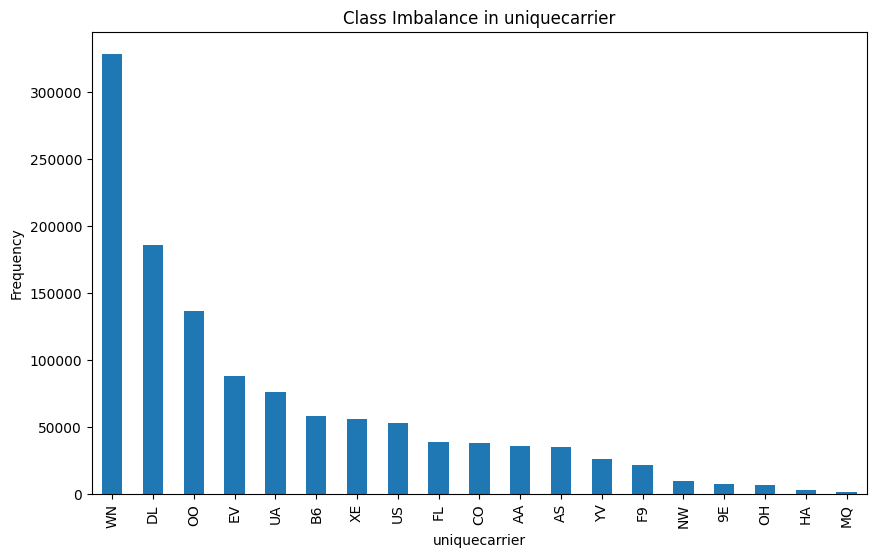

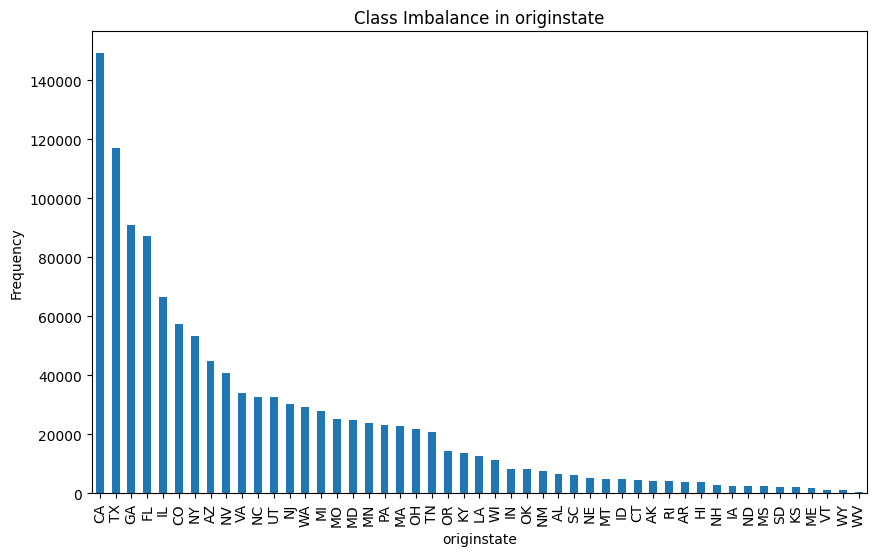

In [65]:
# Function to identify class imbalance in categorical columns
def identify_class_imbalance(df):
    categorical_columns = df.select_dtypes(include=['object']).columns
    imbalance_info = {}

    for column in categorical_columns:
        if df[column].nunique() <= 100:  # Exclude columns with too many unique values
            value_counts = df[column].value_counts()
            imbalance_info[column] = value_counts

    return imbalance_info

# Identify class imbalance
imbalance_info = identify_class_imbalance(df_clean)

# Visualize class imbalance
for column, value_counts in imbalance_info.items():
    plt.figure(figsize=(10, 6))
    value_counts.plot(kind='bar')
    plt.title(f'Class Imbalance in {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


In [66]:
# Write to CSV
#df_encoded.to_csv("C:/Users/tyler.brantingham/OneDrive - Dynatrace/Python/repoSchool/699-Personal/delay_data_clean.csv", index=False)

# USDOT On Time Flight Reporting Dataset Examination

## Conclusion

- Overall this looks like a strong dataset with lots of opportunity to analyze and train. It would be ideal to download additional months of data for completeness.

### Class Imbalance
- There are a high proportion of flights through California, Florida, and Texas. This makes sense given the population and tourism in these states.
- Only 1.5% of flights were cancelled.
- Only 0.2% of flights were diverted.

## Observations

### INFO() on the base dataset
- 109 columns, 504,884 rows
- All the DIV4 and DIV5 columns are null
- Approx 7k rows are missing key data around departure delays.

### Analyzing DESCRIBE()
- There are lots of ID columns that require lookup files
- This dataset only includes data for February 2025. It would be useful to get additional months of data.

#### Mean, Median, Model values:
- The output is quite large and is stored in summary_df
                      
#### Missing values:
- There's missing values on first, second, and third diversion columns. This makes sense if a flight wasn't diverted

#### Inconsistent Data
- There are no duplicate rows
- There are rows with negative values for delay time. I'm interpretting this as flights leaving or arriving early.
- There are 3 columns which capture origin state and another 3 that capture destination state. These can be collapse.

## Code Section: USDOT On Time Flight Dataset

In [67]:
# Load the On Time Flight Dataset
df = pd.read_csv("T_ONTIME_REPORTING.csv", delimiter=",", low_memory=False)
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('[^a-zA-Z0-9_]', '', regex=True).str.replace('__','_')
df_clean = df.dropna(axis=1, how='all')

In [68]:
pd.set_option('display.max_info_columns', 200)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504884 entries, 0 to 504883
Data columns (total 91 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   year                     504884 non-null  int64  
 1   quarter                  504884 non-null  int64  
 2   month                    504884 non-null  int64  
 3   day_of_month             504884 non-null  int64  
 4   day_of_week              504884 non-null  int64  
 5   fl_date                  504884 non-null  object 
 6   op_unique_carrier        504884 non-null  object 
 7   op_carrier_airline_id    504884 non-null  int64  
 8   op_carrier               504884 non-null  object 
 9   tail_num                 504080 non-null  object 
 10  op_carrier_fl_num        504884 non-null  int64  
 11  origin_airport_id        504884 non-null  int64  
 12  origin_airport_seq_id    504884 non-null  int64  
 13  origin_city_market_id    504884 non-null  int64  
 14  orig

In [69]:
df_clean.describe()

,year,quarter,month,day_of_month,day_of_week,op_carrier_airline_id,op_carrier_fl_num,origin_airport_id,origin_airport_seq_id,origin_city_market_id,...,div2_airport_seq_id,div2_wheels_on,div2_total_gtime,div2_longest_gtime,div2_wheels_off,div3_airport_id,div3_airport_seq_id,div3_wheels_on,div3_total_gtime,div3_longest_gtime
count,504884.0,504884.0,504884.0,504884.000000,504884.000000,504884.000000,504884.000000,504884.000000,5.048840e+05,504884.000000,...,2.100000e+01,21.000000,21.000000,21.000000,8.000000,1.0,1.0,1.0,1.0,1.0
mean,2025.0,1.0,2.0,14.814738,4.001820,19952.088012,2494.923721,12667.910809,1.266795e+06,31747.015784,...,1.298523e+06,1366.428571,21.380952,17.761905,1243.625000,14869.0,1486903.0,35.0,7.0,7.0
std,0.0,0.0,0.0,8.046516,2.001488,370.210400,1666.190423,1530.312969,1.530311e+05,1327.603050,...,1.609405e+05,747.595183,14.147354,10.468547,408.238704,NaN,NaN,NaN,NaN,NaN
min,2025.0,1.0,2.0,1.000000,1.000000,19393.000000,1.000000,10135.000000,1.013506e+06,30070.000000,...,1.071302e+06,39.000000,5.000000,5.000000,812.000000,14869.0,1486903.0,35.0,7.0,7.0
25%,2025.0,1.0,2.0,8.000000,2.000000,19790.000000,1128.000000,11292.000000,1.129202e+06,30627.000000,...,1.129202e+06,848.000000,12.000000,12.000000,933.500000,14869.0,1486903.0,35.0,7.0,7.0
50%,2025.0,1.0,2.0,15.000000,4.000000,19930.000000,2210.000000,12889.000000,1.288904e+06,31453.000000,...,1.289208e+06,1708.000000,15.000000,15.000000,1190.000000,14869.0,1486903.0,35.0,7.0,7.0
75%,2025.0,1.0,2.0,22.000000,6.000000,20304.000000,3689.000000,14057.000000,1.405702e+06,32474.000000,...,1.425203e+06,1808.000000,29.000000,24.000000,1416.250000,14869.0,1486903.0,35.0,7.0,7.0
max,2025.0,1.0,2.0,28.000000,7.000000,20452.000000,8818.000000,16869.000000,1.686902e+06,35991.000000,...,1.489302e+06,2300.000000,53.000000,40.000000,2058.000000,14869.0,1486903.0,35.0,7.0,7.0


In [70]:
# Check for duplicate rows
duplicate_rows = df_clean.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_rows}")


Number of duplicate rows: 0


In [71]:
#Analyze stats for each column

# Show all rows and columns in output
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 20)

# Prevent truncation of wide columns
pd.set_option('display.width', 150)
pd.set_option('display.max_colwidth', 200)


# Select numeric columns excluding those ending with '_id'
numeric_df = df_clean.select_dtypes(include=['number'])
numeric_df = numeric_df.loc[:, ~numeric_df.columns.str.endswith('_id')]

# Calculate statistics for each numeric column
mean_values = numeric_df.mean()
median_values = numeric_df.median()
mode_values = numeric_df.mode().iloc[0]
min_values = numeric_df.min()
max_values = numeric_df.max()
variance_values = numeric_df.var()
std_dev_values = numeric_df.std()

# Create a DataFrame to summarize the statistics
summary_df = pd.DataFrame({
    'Column Name': numeric_df.columns,
    'Mean': mean_values,
    'Median': median_values,
    'Mode': mode_values,
    'Min': min_values,
    'Max': max_values,
    'Variance': variance_values,
    'Standard Deviation': std_dev_values
})

# Set 'Column Name' as the index
summary_df.set_index('Column Name', inplace=True)

# Display the summary DataFrame
print(summary_df)



                                Mean  Median    Mode     Min     Max      Variance  Standard Deviation
Column Name                                                                                           
year                     2025.000000  2025.0  2025.0  2025.0  2025.0  0.000000e+00            0.000000
quarter                     1.000000     1.0     1.0     1.0     1.0  0.000000e+00            0.000000
month                       2.000000     2.0     2.0     2.0     2.0  0.000000e+00            0.000000
day_of_month               14.814738    15.0    14.0     1.0    28.0  6.474642e+01            8.046516
day_of_week                 4.001820     4.0     5.0     1.0     7.0  4.005953e+00            2.001488
op_carrier_fl_num        2494.923721  2210.0   540.0     1.0  8818.0  2.776191e+06         1666.190423
origin_state_fips          26.577057    25.0    48.0     1.0    78.0  2.841068e+02           16.855467
origin_wac                 55.148214    51.0    74.0     1.0    93.0  7.1

In [72]:
# Perform one-hot encoding on all object-type (categorical) columns
encode_cols = ['op_unique_carrier','op_carrier','origin','origin_city_name','origin_state_abr','dest','dest_city_name','dest_state_abr','dep_time_blk','arr_time_blk','cancellation_code']
df_encoded = pd.get_dummies(df_clean, columns=encode_cols)

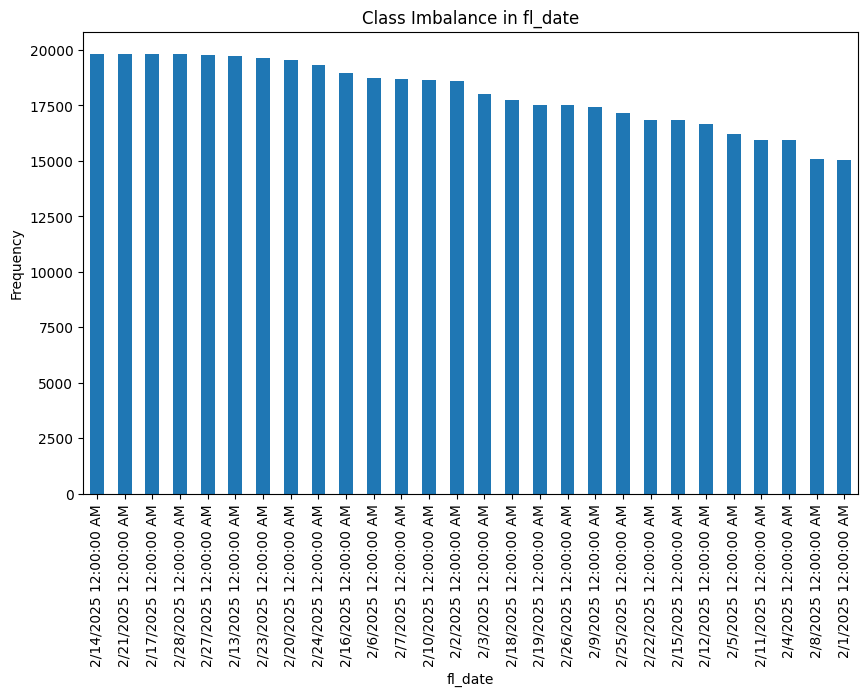

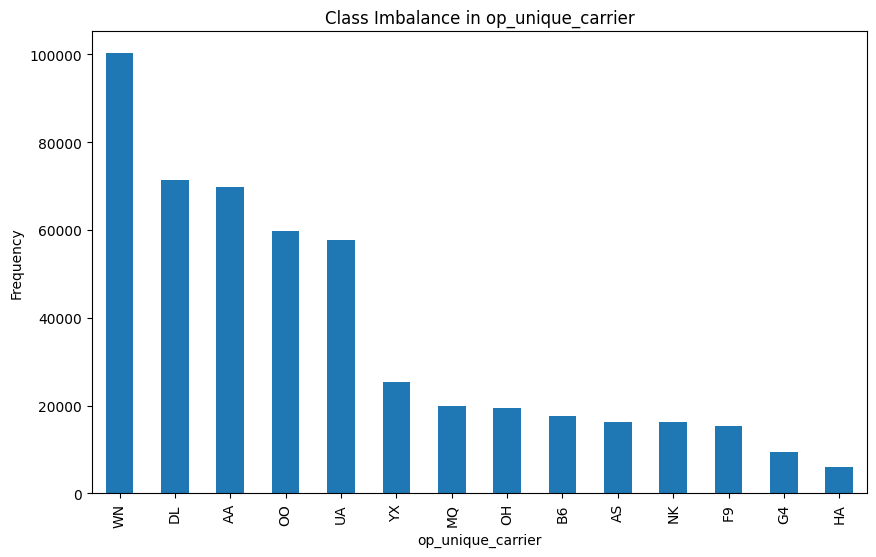

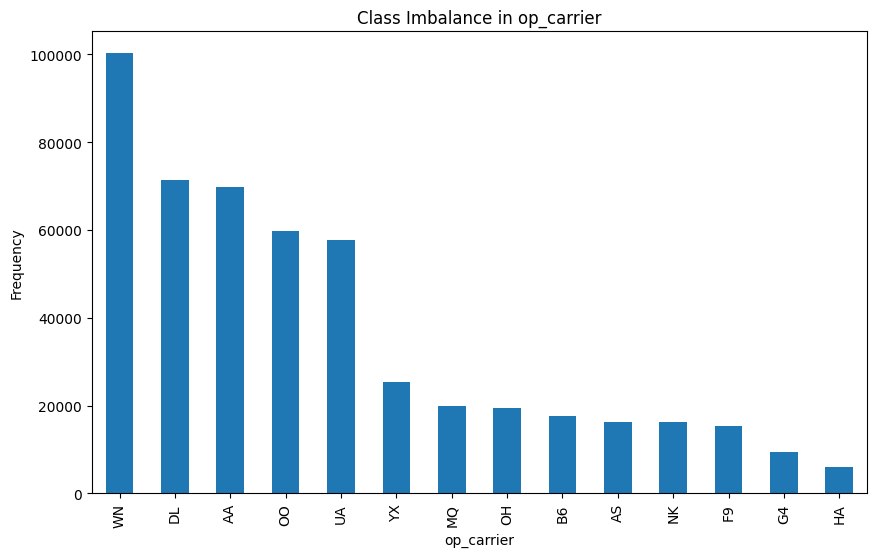

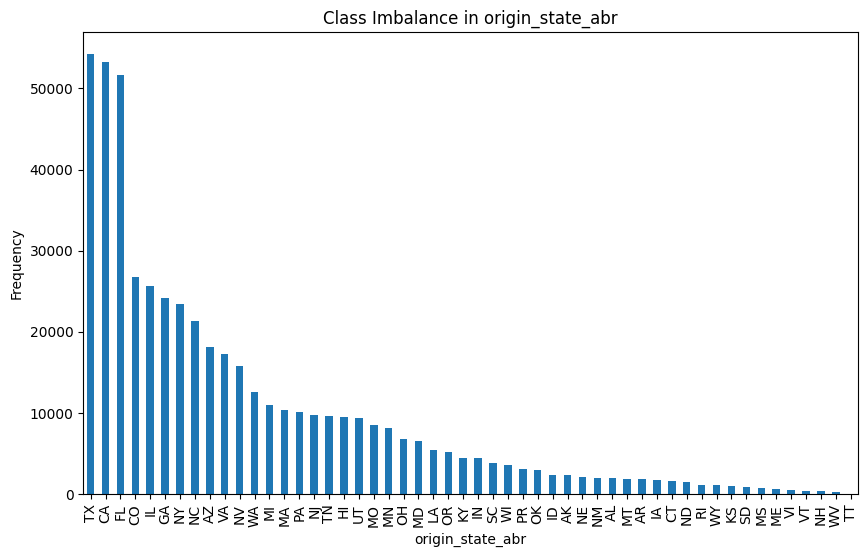

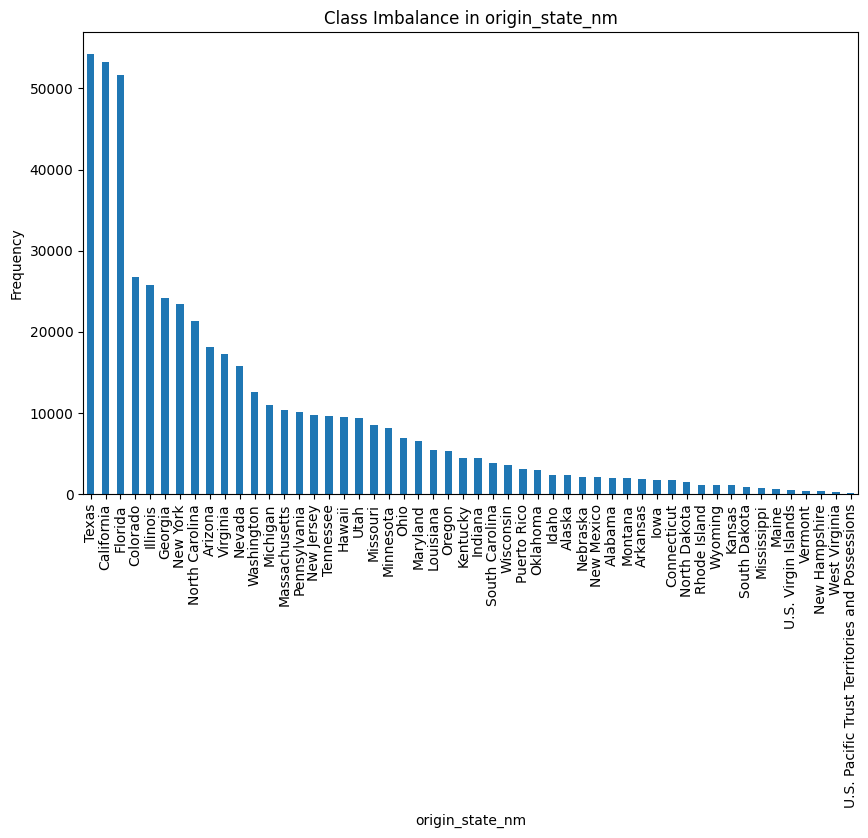

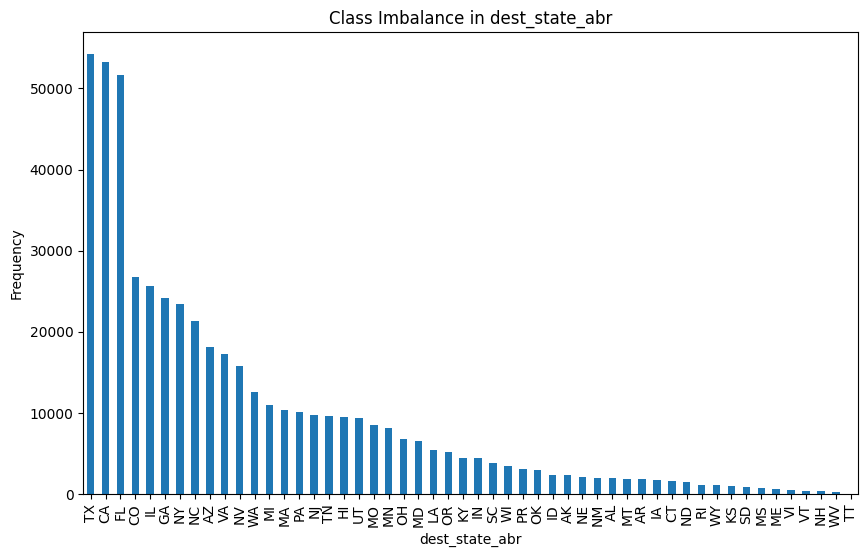

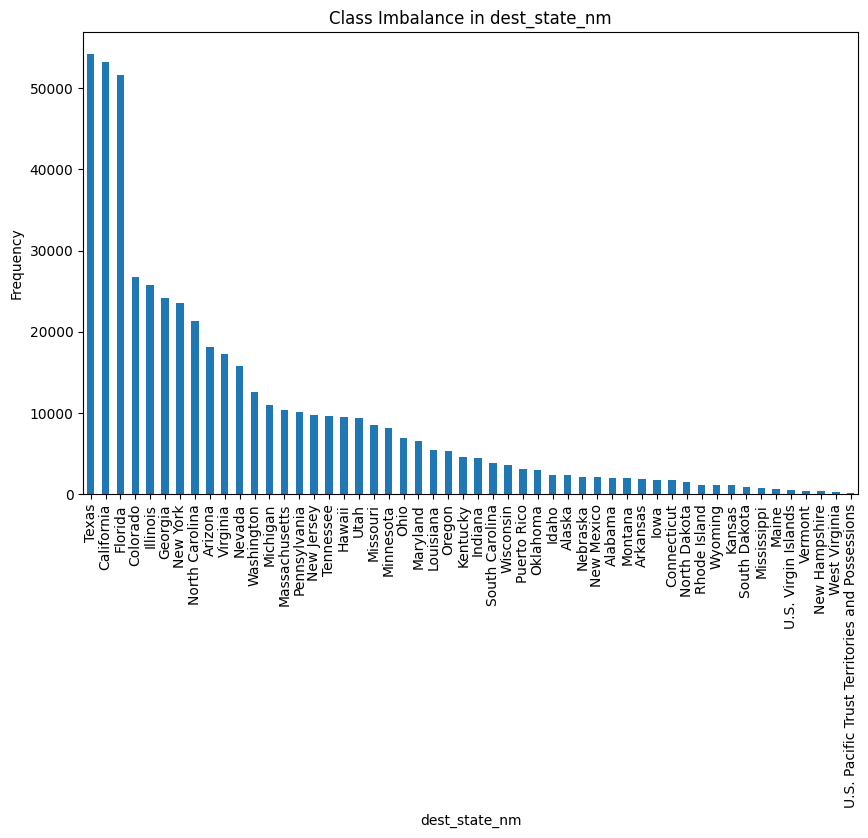

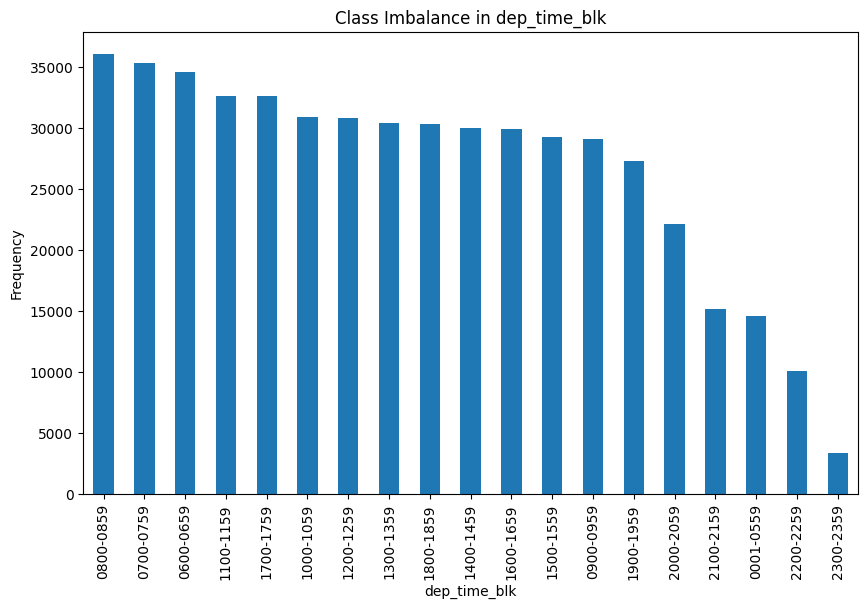

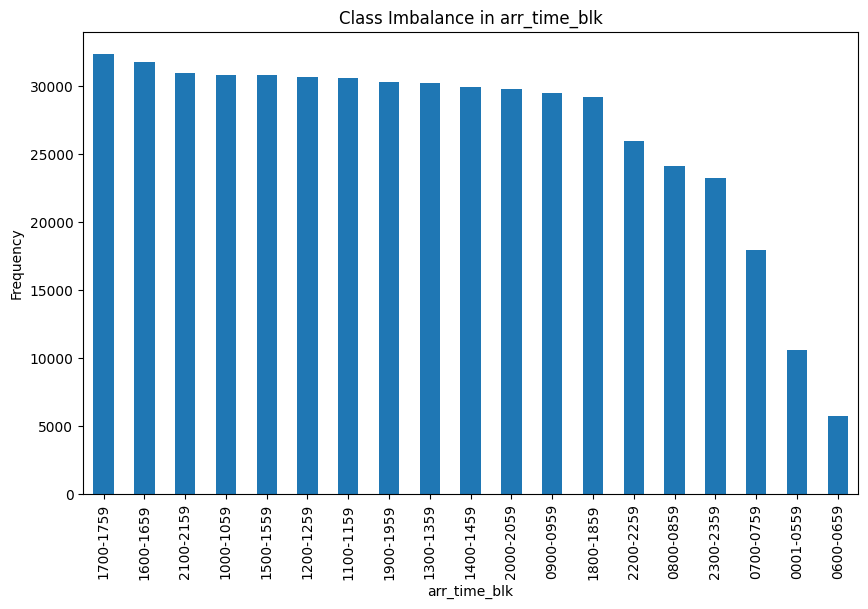

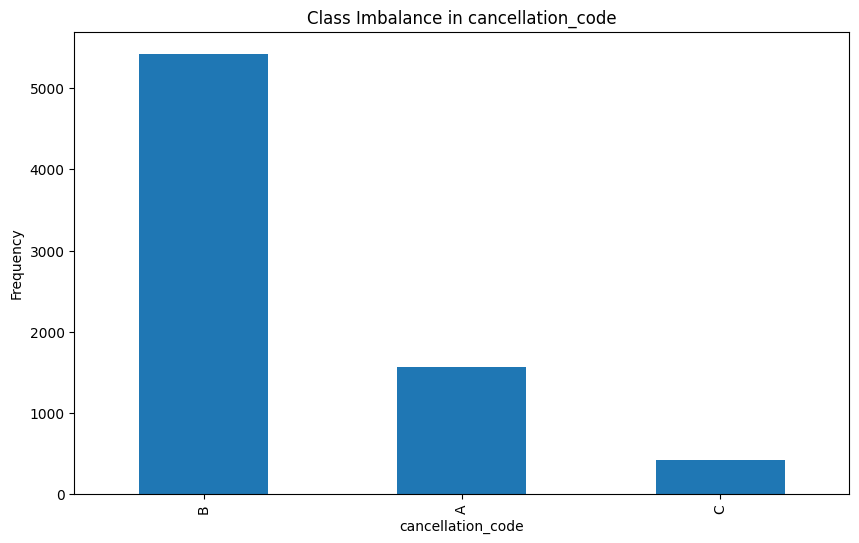

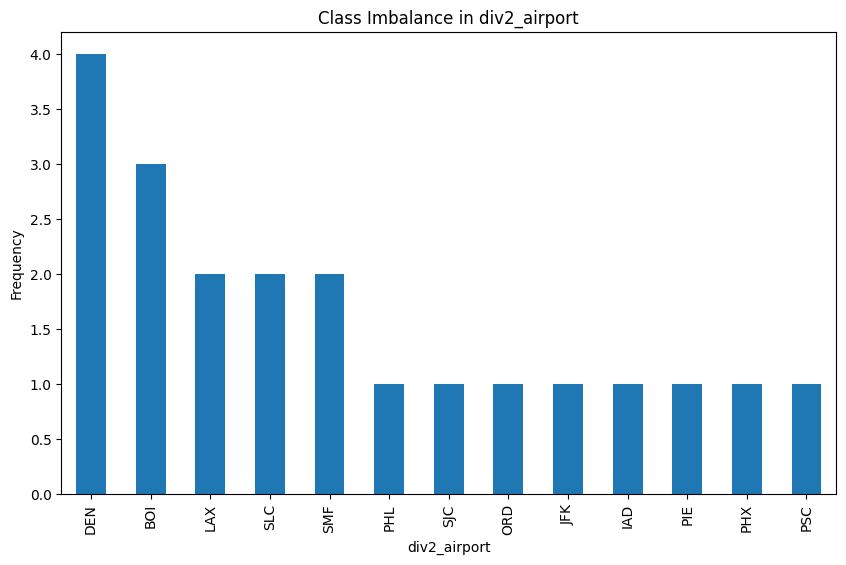

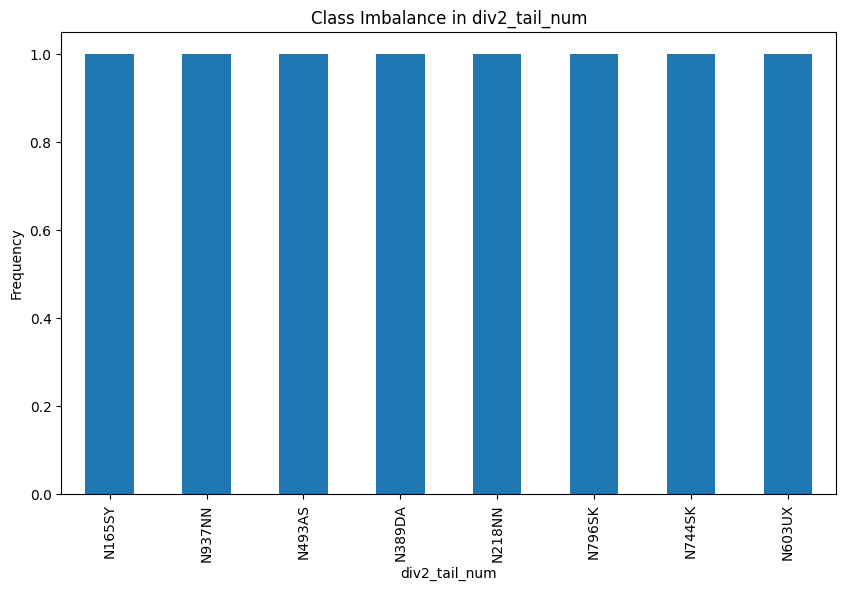

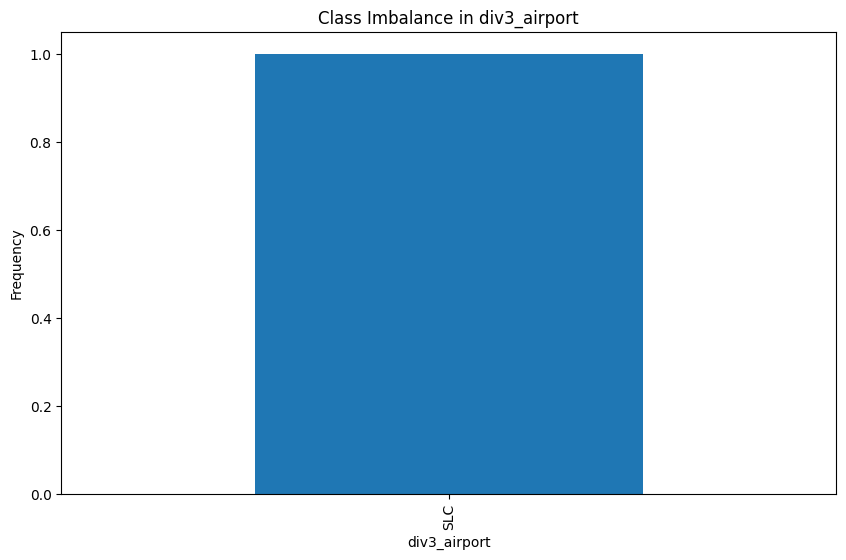

In [73]:

# Function to identify class imbalance in categorical columns
def identify_class_imbalance(df):
    categorical_columns = df.select_dtypes(include=['object']).columns
    imbalance_info = {}

    for column in categorical_columns:
        if df[column].nunique() <= 100:  # Exclude columns with too many unique values
            value_counts = df[column].value_counts()
            imbalance_info[column] = value_counts

    return imbalance_info

# Identify class imbalance
imbalance_info = identify_class_imbalance(df_clean)

# Visualize class imbalance
for column, value_counts in imbalance_info.items():
    plt.figure(figsize=(10, 6))
    value_counts.plot(kind='bar')
    plt.title(f'Class Imbalance in {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


In [74]:
# Function to identify binary columns and measure class imbalance in percentages
def measure_binary_class_imbalance(df):
    binary_columns = [col for col in df.columns if df[col].nunique() == 2]
    imbalance_info = {}

    for column in binary_columns:
        value_counts = df[column].value_counts()
        total = value_counts.sum()
        percentage_distribution = (value_counts / total) * 100
        imbalance_info[column] = percentage_distribution

    return imbalance_info

# Measure class imbalance in binary columns
binary_imbalance_info = measure_binary_class_imbalance(df_clean)

# Print imbalance information
for column, value_counts in binary_imbalance_info.items():
    print(f"Column: {column}")
    print(value_counts.round(2))  # Rounded for readability
    print()


Column: dep_del15
dep_del15
0.0    80.35
1.0    19.65
Name: count, dtype: float64

Column: arr_del15
arr_del15
0.0    79.23
1.0    20.77
Name: count, dtype: float64

Column: cancelled
cancelled
0.0    98.53
1.0     1.47
Name: count, dtype: float64

Column: diverted
diverted
0.0    99.8
1.0     0.2
Name: count, dtype: float64

Column: div_reached_dest
div_reached_dest
1.0    86.44
0.0    13.56
Name: count, dtype: float64



In [75]:
# Write to CSV
# df_encoded.to_csv("C:/Users/tyler.brantingham/OneDrive - Dynatrace/Python/repoSchool/699-Personal/usdot_onetime_clean.csv", index=False)

# Priceline Flight Dataset Examination

## Conclusion
- After several data cleansing steps the datasets appears functional. However, the data lack significant utility as it only captures pricing data for 2 days in April 2025 and lacks significant breadth or depth.
- None of the columns show signifcant class imbalance. Though 25% of the records list "Multiple" airlines.
- Additional features that may be interesting: day of week, day of month, month of year, hour of day, region/continent, departure country, arrival country, domestic/international flight.

## Observations
### Data Quality
- There are several empty columns. The CSV appears to be corrupt. We will remove the bad columns.
- Date and Time columns are text.
- Price column is an object, not numeric.
- There are some rows of bad data. Dollar sign in the price column. Number of Stops = Express Deal. Travel Time = Save $39. etc. These rows will be removed.
### INFO() on the base dataset
- 15 columns, 2,459 rows
- 2 rows missing an airline name
- 296 rows missing a departure airport
- 3 rows missing a ticket price
- 299 rows missing an arrival airport (maybe they never left?)
- Several rows don't have 2nd or 3rd stoppage values. These are most likely flights that were one leg
### Analyzing the clean dataset
- 57 unique airlines
- Travel time rangs from ~2.66 hours to 82 hours
- Wait times range from 39 minutes to 390 minutes
- Ticker prices ranges from $135 to $8000
- 28 duplicate rows

#### Mean values:
- travel_time_minutes      1551.063440
- 1st_stop_wait_minutes     510.922116
- 2nd_stop_wait_minutes     426.108563
- 3rd_stop_wait_minutes     356.764706
- stops                       1.294429
- ticket_price_usd         1316.544603

#### Median values:
- travel_time_minutes      1430.0
- 1st_stop_wait_minutes     424.0
- 2nd_stop_wait_minutes     260.0
- 3rd_stop_wait_minutes     200.0
- stops                       1.0
- ticket_price_usd         1128.0

#### Mode values:
- travel_time_minutes       965.0
- 1st_stop_wait_minutes     130.0
- 2nd_stop_wait_minutes     240.0
- 3rd_stop_wait_minutes     200.0
- stops                       1.0
- ticket_price_usd         1508.0

#### Missing values:
- airline_name                2 (These should dropped)
- depreture_airport         296 (These need to be investigated and potentially dropped)
- 1st_stoppage               59 (It is valid that a flight may not have a stopover)
- 2nd_stoppage             1803 (It is valid that a flight may not have a stopover)
- 3rd_stoppage             2442 (It is valid that a flight may not have a stopover)
- destination_airport       293 (These need to be investigated and potentially dropped)
- travel_time_minutes         0
- 1st_stop_wait_minutes      58 (It is valid that a flight may not have a stopover) 
- 2nd_stop_wait_minutes    1805 (It is valid that a flight may not have a stopover)
- 3rd_stop_wait_minutes    2442 (It is valid that a flight may not have a stopover)
- stops                       0
- ticket_price_usd            4 (Impute using mean or regression)
- arrival_datetime          164 (These need to be investigated and potentially dropped)
- departure_time_24hr         0

#### Inconsistent Data
- It doesn't seem reasonable that a flight would be missing a departure or arrival airport.
- All wait times, stops, and prices seem valid.

## Code Section: Priceline Dataset

In [76]:
# Load the Flight Dataset
df_src = pd.read_csv("flight.csv", delimiter=",", low_memory=False)

def flight_data_cleaner(df):
    # Remove the junk columns
    df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
    # Clean up the column names
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('[^a-zA-Z0-9_]', '', regex=True).str.replace('__','_')
    return df

def convert_to_minutes(time_str):
    if pd.isna(time_str):
        return np.nan
    if isinstance(time_str, float):
        return np.nan
    try:
        total_minutes = 0
        if 'h' in time_str:
            hours, minutes = time_str.split('h ')
            total_minutes += int(hours) * 60
            total_minutes += int(minutes.replace('m', ''))
        else:
            total_minutes += int(time_str.replace('m', ''))
        return total_minutes
    except:
        return None

df_src = flight_data_cleaner(df_src)
df_clean = df_src.copy()
df_clean['travel_time_minutes'] = df_clean['travel_time'].apply(convert_to_minutes)
df_clean['1st_stop_wait_minutes'] = df_clean['1st_stoppage_waiting_hour'].apply(convert_to_minutes)
df_clean['2nd_stop_wait_minutes'] = df_clean['2nd_stoppagewaiting_time'].apply(convert_to_minutes)
df_clean['3rd_stop_wait_minutes'] = df_clean['3rd_stoppage_waiting_time'].apply(convert_to_minutes)


# Map the stops column
stops_mapping = {
    'Nonstop': 0,
    '1 Stop': 1,
    '2 Stops': 2,
    '3 Stops': 3
}
df_clean['stops'] = df_clean['number_of_stoppage'].map(stops_mapping)

# Replace any value containing a dollar sign with None
df_clean['ticket_prizedoller'] = df_clean['ticket_prizedoller'].apply(lambda x: None if '$' in str(x) or 'Alaska' in str(x) else x)
# Convert the entire column to float
df_clean['ticket_price_usd'] = df_clean['ticket_prizedoller'].astype(float)


def clean_and_combine_datetime(df, date_col, time_col):
    def parse_datetime(date_str, time_str):
        try:
            # Strip leading/trailing spaces and prefixes
            if isinstance(date_str, str):
                date_str = date_str.strip()
                if 'Arrives:' in date_str:
                    date_str = date_str.split('Arrives: ')[-1]
                date_str = date_str.split(', ')[-1]
            else:
                return None
            
            if isinstance(time_str, str):
                time_str = time_str.strip().upper().replace('A', 'AM').replace('P', 'PM')
            else:
                return None
            
            # Add current year to date string
            current_year = datetime.now().year
            date_str = f"{date_str} {current_year}"
            
            # Combine date and time strings
            datetime_str = f"{date_str} {time_str}"
            
            # Parse combined datetime string
            return datetime.strptime(datetime_str, '%b %d %Y %I:%M%p')
        except ValueError:
            return None
    
    # Apply the parsing function to the DataFrame
    df['arrival_datetime'] = df.apply(lambda row: parse_datetime(row[date_col], row[time_col]), axis=1)
    
    return df

def convert_to_24_hour(time_str):
    try:
        # Check if the value is a string
        if isinstance(time_str, str):
            # Normalize lowercase 'a'/'p' to 'AM'/'PM'
            time_str = time_str.replace('a', 'AM').replace('p', 'PM')
            # Convert to 24-hour format
            return datetime.strptime(time_str, '%I:%M%p').strftime('%H:%M')
        else:
            return None
    except (ValueError, TypeError):
        # Return None for invalid or missing values
        return None

# Apply the conversion function to the 'depreture_time' column
df_clean['departure_time_24hr'] = df_clean['depreture_time'].apply(convert_to_24_hour)
df_clean.rename(columns={'depreture_airport': 'departure_airport'}, inplace=True)


#Remove all the junk columns
junk_cols = {'travel_time', 'number_of_stoppage','depreture_time','ticket_prizedoller','1st_stoppage_waiting_hour','2nd_stoppagewaiting_time','3rd_stoppage_waiting_time','arrival_date','arrival_time'}

df_clean = df_clean.drop(columns=junk_cols)


In [77]:
print(df_src.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2461 entries, 0 to 2460
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   airline_name               2459 non-null   object
 1   travel_time                2461 non-null   object
 2   number_of_stoppage         2461 non-null   object
 3   ticket_prizedoller         2458 non-null   object
 4   depreture_airport          2164 non-null   object
 5   depreture_time             2460 non-null   object
 6   1st_stoppage_waiting_hour  2402 non-null   object
 7   1st_stoppage               2401 non-null   object
 8   2nd_stoppagewaiting_time   655 non-null    object
 9   2nd_stoppage               656 non-null    object
 10  3rd_stoppage_waiting_time  17 non-null     object
 11  3rd_stoppage               17 non-null     object
 12  destination_airport        2167 non-null   object
 13  arrival_time               2451 non-null   object
 14  arrival_

In [78]:
df_clean.describe()
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2461 entries, 0 to 2460
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   airline_name           2459 non-null   object 
 1   departure_airport      2164 non-null   object 
 2   1st_stoppage           2401 non-null   object 
 3   2nd_stoppage           656 non-null    object 
 4   3rd_stoppage           17 non-null     object 
 5   destination_airport    2167 non-null   object 
 6   travel_time_minutes    2459 non-null   float64
 7   1st_stop_wait_minutes  2401 non-null   float64
 8   2nd_stop_wait_minutes  654 non-null    float64
 9   3rd_stop_wait_minutes  17 non-null     float64
 10  stops                  2459 non-null   float64
 11  ticket_price_usd       2455 non-null   float64
 12  departure_time_24hr    2459 non-null   object 
dtypes: float64(6), object(7)
memory usage: 250.1+ KB


In [79]:
# Check for duplicate rows
duplicate_rows = df_clean.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_rows}")


Number of duplicate rows: 31


In [80]:
# Filter numeric columns
numeric_df = df_clean.select_dtypes(include=['number'])

# Calculate mean, median, and mode of each numeric column
mean_values = numeric_df.mean()
median_values = numeric_df.median()
mode_values = numeric_df.mode().iloc[0]

print("\nMean values:")
print(mean_values)
print("\nMedian values:")
print(median_values)
print("\nMode values:")
print(mode_values)


Mean values:
travel_time_minutes      1551.063440
1st_stop_wait_minutes     510.922116
2nd_stop_wait_minutes     426.108563
3rd_stop_wait_minutes     356.764706
stops                       1.294429
ticket_price_usd         1316.544603
dtype: float64

Median values:
travel_time_minutes      1430.0
1st_stop_wait_minutes     424.0
2nd_stop_wait_minutes     260.0
3rd_stop_wait_minutes     200.0
stops                       1.0
ticket_price_usd         1128.0
dtype: float64

Mode values:
travel_time_minutes       965.0
1st_stop_wait_minutes     130.0
2nd_stop_wait_minutes     240.0
3rd_stop_wait_minutes     200.0
stops                       1.0
ticket_price_usd         1508.0
Name: 0, dtype: float64


In [81]:
# Check for missing or null values
missing_values = df_clean.isnull().sum()
print("\nMissing values:")
print(missing_values)


Missing values:
airline_name                2
departure_airport         297
1st_stoppage               60
2nd_stoppage             1805
3rd_stoppage             2444
destination_airport       294
travel_time_minutes         2
1st_stop_wait_minutes      60
2nd_stop_wait_minutes    1807
3rd_stop_wait_minutes    2444
stops                       2
ticket_price_usd            6
departure_time_24hr         2
dtype: int64


In [82]:
# Fill missing values with mean
df_clean['ticket_price_usd'] = df_clean['ticket_price_usd'].fillna(df_clean['ticket_price_usd'].mean())

In [83]:
# Perform one-hot encoding on all object-type (categorical) columns
encode_cols = ['airline_name','departure_airport', '1st_stoppage','2nd_stoppage','3rd_stoppage','destination_airport']
df_encoded = pd.get_dummies(df_clean, columns=encode_cols)

Column: airline_name
airline_name
Multiple                          546
Emirates                          202
Qatar                             202
British                           177
United                            160
American                          123
IndiGo                            103
Turkish                            95
Lufthansa                          84
Delta                              64
Singapore                          61
Air India                          54
Air Canada                         51
Etihad                             50
KLM-Royal Dutch                    49
SWISS                              47
Vistara                            45
Gulf Air Company                   41
Virgin Atlantic                    36
Air France                         31
Hahn Air Systems                   22
Cathay Pacific                     19
Kuwait                             16
Oman                               15
Finnair                            15
SpiceJet        

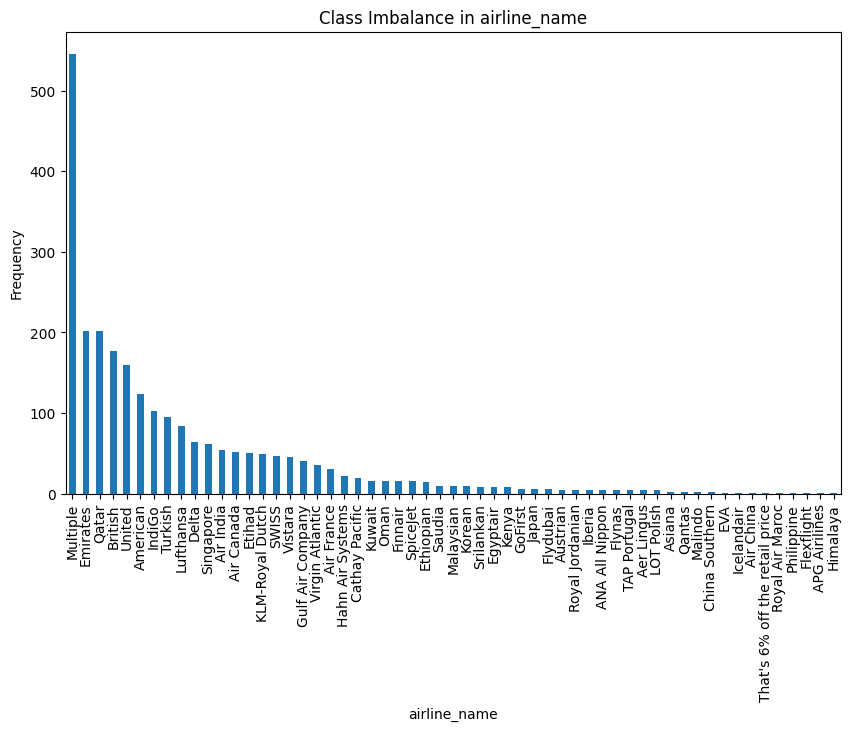

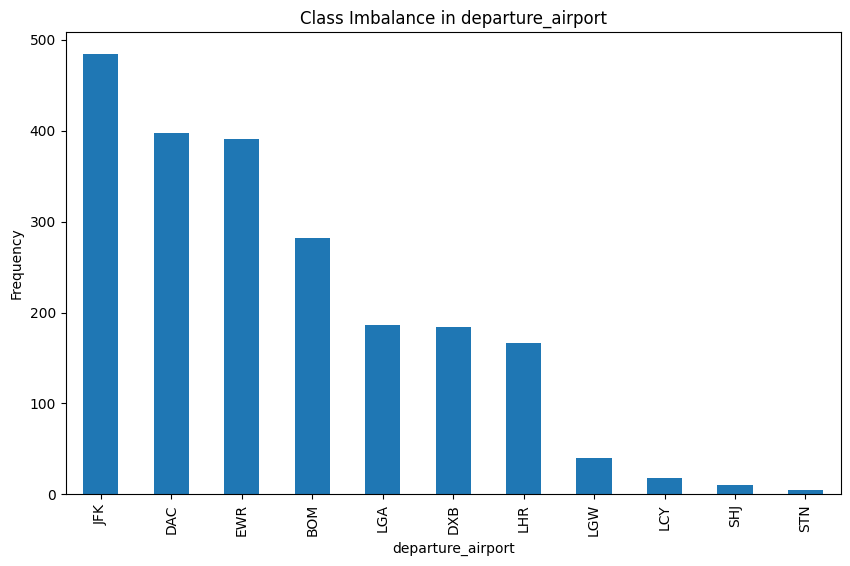

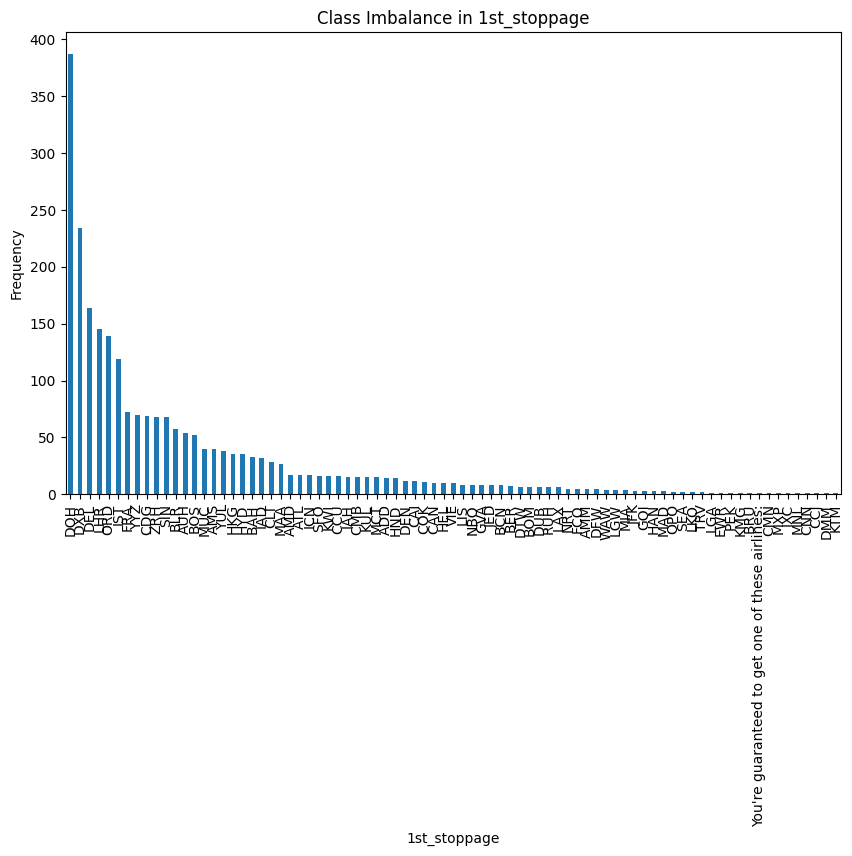

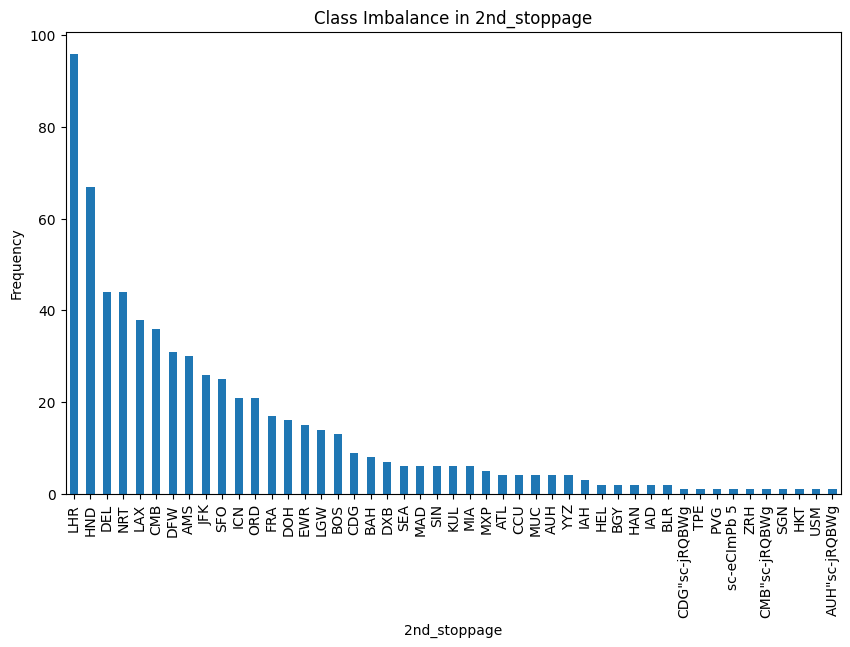

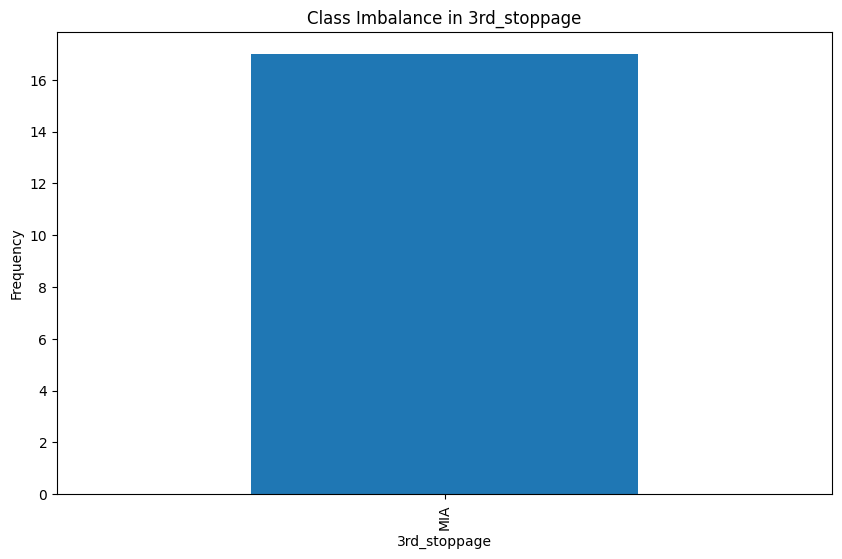

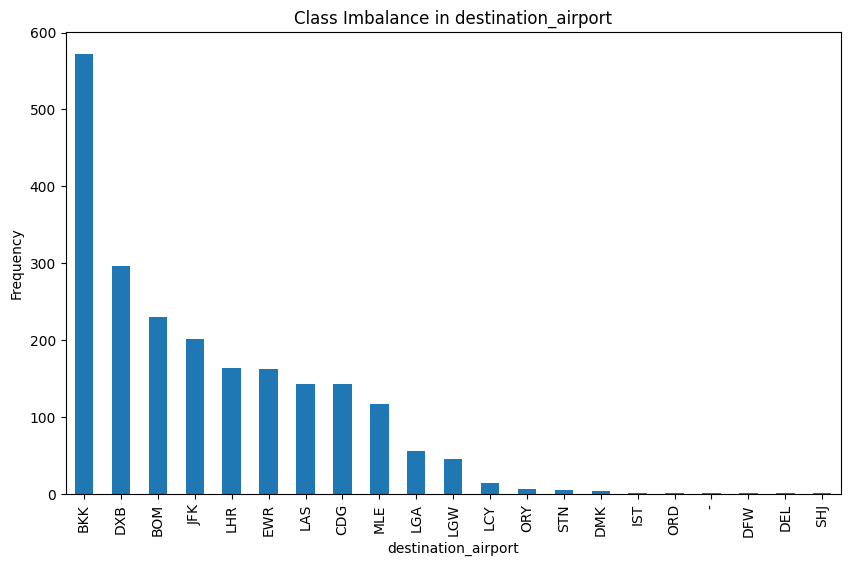

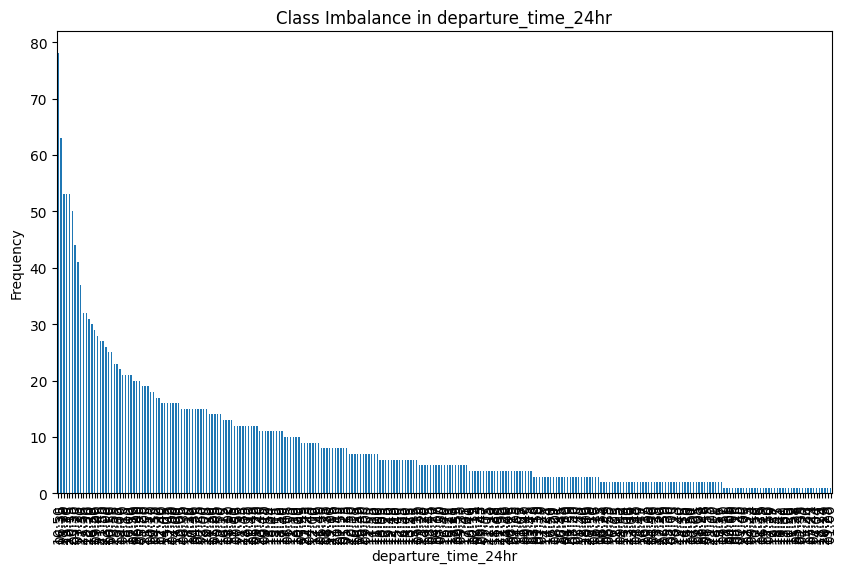

In [84]:
# Function to identify class imbalance in categorical columns
def identify_class_imbalance(df):
    categorical_columns = df.select_dtypes(include=['object']).columns
    imbalance_info = {}
    
    for column in categorical_columns:
        value_counts = df[column].value_counts()
        imbalance_info[column] = value_counts
    
    return imbalance_info

# Identify class imbalance
imbalance_info = identify_class_imbalance(df_clean)

# Print imbalance information
for column, value_counts in imbalance_info.items():
    print(f"Column: {column}")
    print(value_counts)
    print()

# Visualize class imbalance
for column, value_counts in imbalance_info.items():
    plt.figure(figsize=(10, 6))
    value_counts.plot(kind='bar')
    plt.title(f'Class Imbalance in {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()



In [85]:
# Write to CSV
#df_encoded.to_csv("C:/Users/tyler.brantingham/OneDrive - Dynatrace/Python/repoSchool/699-Personal/priceline_clean.csv", index=False)

# 4. Storytelling With Data graph

Just like last week: choose any graph in the Introduction of Storytelling With Data. Use matplotlib to reproduce it in a rough way. I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph. However, if you're excited about learning to use matplotlib, this is a good way to do that. You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

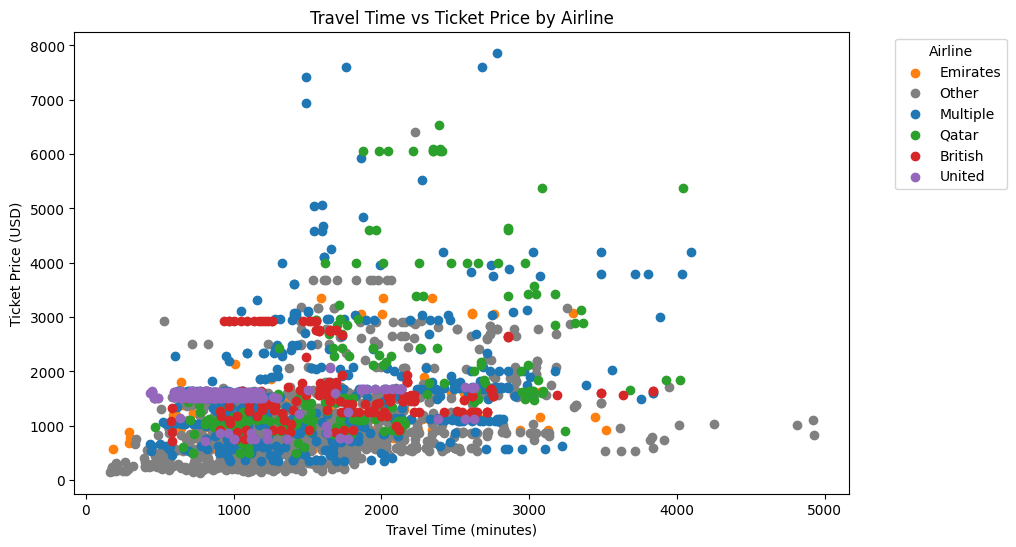

In [86]:
import matplotlib.pyplot as plt

# Get the top 10 most frequent airline names
top_airlines = df_clean['airline_name'].value_counts().nlargest(5).index

# Create a new column to group other airlines into 'Other'
df_clean['airline_group'] = df_clean['airline_name'].apply(lambda x: x if x in top_airlines else 'Other')

# Define colors for top airlines and 'Other'
colors = list(plt.cm.tab10.colors[:10]) + [(0.5, 0.5, 0.5)]  # Convert tuple to list before concatenation
color_map = {airline: colors[i] for i, airline in enumerate(top_airlines)}
color_map['Other'] = colors[-1]

# Plot scatter plot
plt.figure(figsize=(10, 6))
for airline in df_clean['airline_group'].unique():
    subset = df_clean[df_clean['airline_group'] == airline]
    plt.scatter(subset['travel_time_minutes'], subset['ticket_price_usd'], c=[color_map[airline]], label=airline)

plt.xlabel('Travel Time (minutes)')
plt.ylabel('Ticket Price (USD)')
plt.title('Travel Time vs Ticket Price by Airline')
plt.legend(title='Airline', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()